In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

In [3]:
folder_name = 'spin'
folder_name = 'data/' + folder_name
# folder_nameに対応するフォルダの中のcsvファイルを読み込む
path = folder_name
# folder_nameの中にあるファイル名を取得する
file_names = os.listdir(folder_name)
# 'all.csv'がある場合は削除する
if 'all.csv' in file_names:
    file_names.remove('all.csv')
print(file_names)
# csvファイルのみを取得する
df = pd.DataFrame()
for file_name in file_names:
    # ファイル名を取得する
    print(file_name)
    df_tmp = pd.read_csv(os.path.join(folder_name, file_name))
    file_type = file_name.replace('.csv', '')

    # 列名を変更してファイル名を追加
    df_tmp = df_tmp.rename(columns={'x': file_type + '_x', 'y': file_type + '_y', 'z': file_type + '_z'})
    
    # 'rotate.csv' に 'w' 列がある場合は削除
    if 'w' in df_tmp.columns and file_name == 'rotate.csv':
        df_tmp = df_tmp.drop(['w'], axis=1)

    # 'time'列の変換を実行
    df_tmp['time'] = df_tmp['time'] / 1000
    df_tmp['time'] = pd.to_datetime(df_tmp['time'], unit='s')

    # df_tmpをdfに追記する,既にある列名は追記しない
    df = pd.concat([df, df_tmp], axis=1, sort=False)
    print(df)

# 1行目のtime列以外のtime列を削除する
df = df.iloc[:, [0] + [i for i in range(1, len(df.columns)) if not df.columns[i].startswith('time')]]

# # 'time'columnをindexにする
# df = df.set_index('time')

# dfをcsvファイルとして保存する
df.to_csv(os.path.join(path, 'all.csv'), index=False)

['rotate.csv', 'angularVelocity.csv', 'velocity.csv', 'position.csv']
rotate.csv
                        time  rotate_x  rotate_y  rotate_z
0    1970-01-20 15:36:08.874  0.000000  0.000000  0.000000
1    1970-01-20 15:36:08.875 -0.153228  0.395649  0.050493
2    1970-01-20 15:36:08.875 -0.151719  0.396240  0.049747
3    1970-01-20 15:36:08.875 -0.150435  0.396841  0.048338
4    1970-01-20 15:36:08.875 -0.149978  0.396838  0.048566
...                      ...       ...       ...       ...
7411 1970-01-20 15:36:08.976  0.000000  0.000000  0.000000
7412 1970-01-20 15:36:08.976  0.000000  0.000000  0.000000
7413 1970-01-20 15:36:08.976  0.000000  0.000000  0.000000
7414 1970-01-20 15:36:08.976  0.000000  0.000000  0.000000
7415 1970-01-20 15:36:08.976  0.000000  0.000000  0.000000

[7416 rows x 4 columns]
angularVelocity.csv
                        time  rotate_x  rotate_y  rotate_z  \
0    1970-01-20 15:36:08.874  0.000000  0.000000  0.000000   
1    1970-01-20 15:36:08.875 -0.153228  0.

In [4]:
class Data:
    def __init__(self, folder_name):
        self.folder_name = 'data/' + folder_name
        self.path = folder_name
        self.file_names = os.listdir(self.folder_name)
        
        # 'all.csv'がある場合は削除する
        if 'all.csv' in self.file_names:
            self.file_names.remove('all.csv')
        
        self.df = pd.DataFrame()
        for file_name in self.file_names:
            df_tmp = pd.read_csv(os.path.join(self.folder_name, file_name))
            file_type = file_name.replace('.csv', '')

            # 列名を変更してファイル名を追加
            df_tmp = df_tmp.rename(columns={'x': file_type + '_x', 'y': file_type + '_y', 'z': file_type + '_z'})
            
            # 'rotate.csv' に 'w' 列がある場合は削除
            if 'w' in df_tmp.columns and file_name == 'rotate.csv':
                df_tmp = df_tmp.drop(['w'], axis=1)

            # 'time'列の変換を実行
            df_tmp['time'] = df_tmp['time'] / 1000
            df_tmp['time'] = pd.to_datetime(df_tmp['time'], unit='s')

            # df_tmpをdfに追記する,既にある列名は追記しない
            self.df = pd.concat([self.df, df_tmp], axis=1, sort=False)

        # 1行目のtime列以外のtime列を削除する
        self.df = self.df.iloc[:, [0] + [i for i in range(1, len(self.df.columns)) if not self.df.columns[i].startswith('time')]]

    def low_filter(self, column_type, n):
        column = column_type + '_x'
        self.df[column + '_low'] = self.df[column].rolling(n).mean()
        column = column_type + '_y'
        self.df[column + '_low'] = self.df[column].rolling(n).mean()
        column = column_type + '_z'
        self.df[column + '_low'] = self.df[column].rolling(n).mean()
        return self

In [5]:
# dataの読み込み
df_spin_angularVelocity = pd.read_csv('data/spin/angularVelocity.csv')
df_spin_rotate = pd.read_csv('data/spin/rotate.csv')
df_spin_position = pd.read_csv('data/spin/position.csv')
df_spin_velocity = pd.read_csv('data/spin/velocity.csv')

In [6]:
# velocityを微分して加速度を求める
df_spin_acceleration = df_spin_velocity
df_spin_acceleration['x'] = df_spin_acceleration['x'].diff()
df_spin_acceleration['y'] = df_spin_acceleration['y'].diff()
df_spin_acceleration['z'] = df_spin_acceleration['z'].diff()

In [7]:
# dataの読み込み
df_updown_angularVelocity = pd.read_csv('data/updown/angularVelocity.csv')
df_updown_rotate = pd.read_csv('data/updown/rotate.csv')
df_updown_position = pd.read_csv('data/updown/position.csv')
df_updown_velocity = pd.read_csv('data/updown/velocity.csv')

In [10]:
# # velocityを微分して加速度を求める
# df_updown_acceleration = df_updown_velocity
# df_updown_acceleration['x'] = df_updown_acceleration['x'].diff()
# df_updown_acceleration['y'] = df_updown_acceleration['y'].diff()
# df_updown_acceleration['z'] = df_updown_acceleration['z'].diff()

KeyError: 'x'

In [11]:
df_work_angularVelocity = pd.read_csv('data/work/angularVelocity.csv')
df_work_rotate = pd.read_csv('data/work/rotate.csv')
df_work_position = pd.read_csv('data/work/position.csv')
df_work_velocity = pd.read_csv('data/work/velocity.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/work/angularVelocity.csv'

In [ ]:
df_work_acceleration = df_work_velocity
df_work_acceleration['x'] = df_work_acceleration['x'].diff()
df_work_acceleration['y'] = df_work_acceleration['y'].diff()
df_work_acceleration['z'] = df_work_acceleration['z'].diff()

In [ ]:
# timeを1000で割って秒にする
df_spin_angularVelocity['time'] = df_spin_angularVelocity['time'] / 1000
df_spin_rotate['time'] = df_spin_rotate['time'] / 1000
df_spin_position['time'] = df_spin_position['time'] / 1000
df_spin_velocity['time'] = df_spin_velocity['time'] / 1000
df_spin_acceleration['time'] = df_spin_acceleration['time'] / 1000

df_updown_angularVelocity['time'] = df_updown_angularVelocity['time'] / 1000
df_updown_rotate['time'] = df_updown_rotate['time'] / 1000
df_updown_position['time'] = df_updown_position['time'] / 1000
df_updown_velocity['time'] = df_updown_velocity['time'] / 1000
# df_updown_acceleration['time'] = df_updown_acceleration['time'] / 1000

df_work_angularVelocity['time'] = df_work_angularVelocity['time'] / 1000
df_work_rotate['time'] = df_work_rotate['time'] / 1000
df_work_position['time'] = df_work_position['time'] / 1000
df_work_velocity['time'] = df_work_velocity['time'] / 1000
df_work_acceleration['time'] = df_work_acceleration['time'] / 1000

In [ ]:
# UNIX時間をdatetimeに変換
df_spin_angularVelocity['time'] = pd.to_datetime(df_spin_angularVelocity['time'] , unit='s') 
df_spin_rotate['time'] = pd.to_datetime(df_spin_rotate['time'] , unit='s') 
df_spin_position['time'] = pd.to_datetime(df_spin_position['time'] , unit='s') 
df_spin_velocity['time'] = pd.to_datetime(df_spin_velocity['time'] , unit='s') 
df_spin_acceleration['time'] = pd.to_datetime(df_spin_acceleration['time'] , unit='s') 

df_updown_angularVelocity['time'] = pd.to_datetime(df_updown_angularVelocity['time']  , unit='s')
df_updown_rotate['time'] = pd.to_datetime(df_updown_rotate['time']  , unit='s')
df_updown_position['time'] = pd.to_datetime(df_updown_position['time']  , unit='s')
df_updown_velocity['time'] = pd.to_datetime(df_updown_velocity['time']  , unit='s')
# df_updown_acceleration['time'] = pd.to_datetime(df_updown_acceleration['time']  , unit='s')

df_work_angularVelocity['time'] = pd.to_datetime(df_work_angularVelocity['time']  , unit='s')
df_work_rotate['time'] = pd.to_datetime(df_work_rotate['time']  , unit='s')
df_work_position['time'] = pd.to_datetime(df_work_position['time']  , unit='s')
df_work_velocity['time'] = pd.to_datetime(df_work_velocity['time']  , unit='s')
df_work_acceleration['time'] = pd.to_datetime(df_work_acceleration['time']  , unit='s')

/var/folders/qx/g75h6sns4slc8l4sb8lsy3l00000gn/T/ipykernel_80280/103764846.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


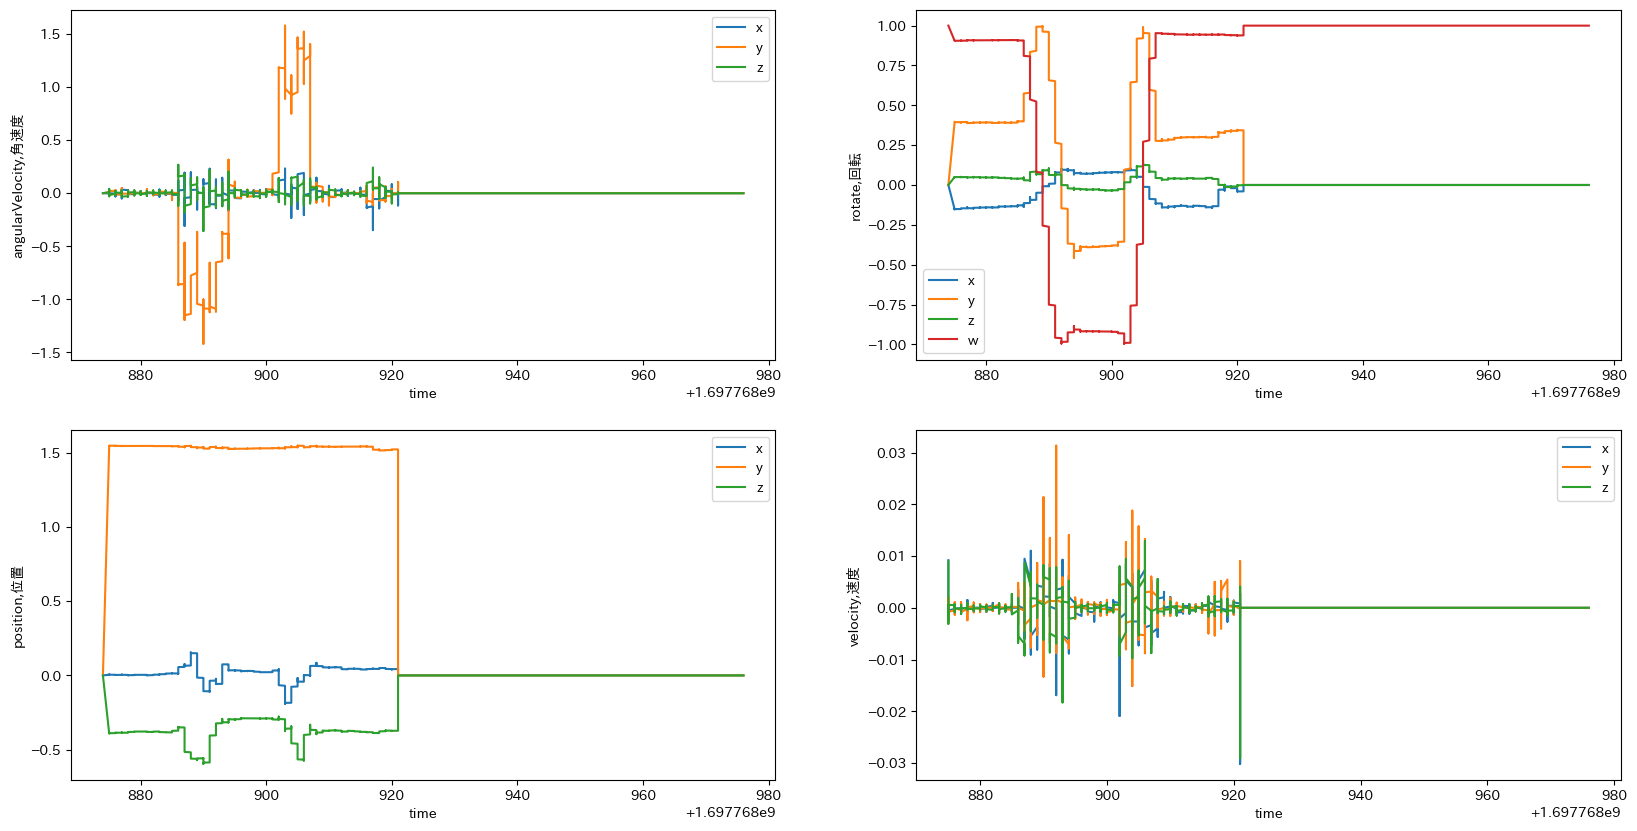

In [12]:
# とりあえず全て描画
plt.figure(figsize=(20, 10))
plt.title('spin')
plt.subplot(2, 2, 1)
plt.plot(df_spin_angularVelocity['time'], df_spin_angularVelocity['x'], label='x')
plt.plot(df_spin_angularVelocity['time'], df_spin_angularVelocity['y'], label='y')
plt.plot(df_spin_angularVelocity['time'], df_spin_angularVelocity['z'], label='z')
plt.xlabel('time')
plt.ylabel('angularVelocity,角速度')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df_spin_rotate['time'], df_spin_rotate['x'], label='x')
plt.plot(df_spin_rotate['time'], df_spin_rotate['y'], label='y')
plt.plot(df_spin_rotate['time'], df_spin_rotate['z'], label='z')
plt.plot(df_spin_rotate['time'], df_spin_rotate['w'], label='w')
plt.xlabel('time')
plt.ylabel('rotate,回転')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df_spin_position['time'], df_spin_position['x'], label='x')
plt.plot(df_spin_position['time'], df_spin_position['y'], label='y')
plt.plot(df_spin_position['time'], df_spin_position['z'], label='z')
plt.xlabel('time')
plt.ylabel('position,位置')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df_spin_velocity['time'], df_spin_velocity['x'], label='x')
plt.plot(df_spin_velocity['time'], df_spin_velocity['y'], label='y')
plt.plot(df_spin_velocity['time'], df_spin_velocity['z'], label='z')
plt.xlabel('time')
plt.ylabel('velocity,速度')
plt.legend()

plt.show()

/var/folders/qx/g75h6sns4slc8l4sb8lsy3l00000gn/T/ipykernel_82653/351378683.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


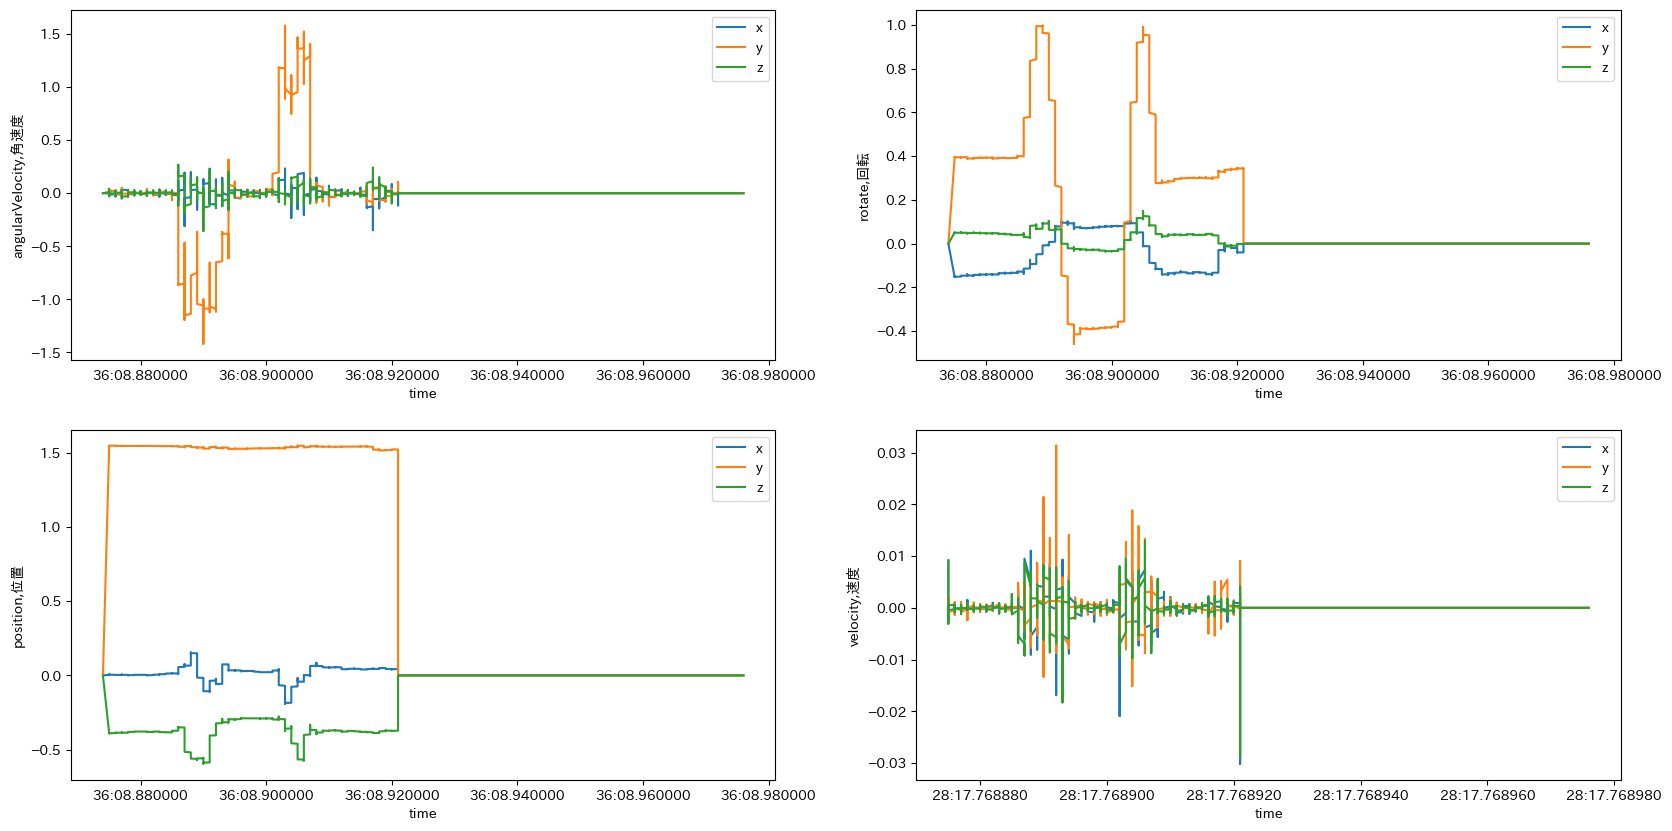

In [ ]:
# 2:28:45までのデータを描画
plt.figure(figsize=(20, 10))
plt.title('spin')
plt.subplot(2, 2, 1)
plt.plot(df_spin_angularVelocity['time'], df_spin_angularVelocity['x'], label='x')
plt.plot(df_spin_angularVelocity['time'], df_spin_angularVelocity['y'], label='y')
plt.plot(df_spin_angularVelocity['time'], df_spin_angularVelocity['z'], label='z')
plt.xlabel('time')
plt.ylabel('angularVelocity,角速度')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df_spin_rotate['time'], df_spin_rotate['x'], label='x')
plt.plot(df_spin_rotate['time'], df_spin_rotate['y'], label='y')
plt.plot(df_spin_rotate['time'], df_spin_rotate['z'], label='z')
# plt.plot(df_spin_rotate['time'], df_spin_rotate['w'], label='w')
plt.xlabel('time')
plt.ylabel('rotate,回転')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df_spin_position['time'], df_spin_position['x'], label='x')
plt.plot(df_spin_position['time'], df_spin_position['y'], label='y')
plt.plot(df_spin_position['time'], df_spin_position['z'], label='z')
plt.xlabel('time')
plt.ylabel('position,位置')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df_spin_velocity['time'], df_spin_velocity['x'], label='x')
plt.plot(df_spin_velocity['time'], df_spin_velocity['y'], label='y')
plt.plot(df_spin_velocity['time'], df_spin_velocity['z'], label='z')
plt.xlabel('time')
plt.ylabel('velocity,速度')
plt.legend()

plt.show()

/var/folders/qx/g75h6sns4slc8l4sb8lsy3l00000gn/T/ipykernel_80280/2214419432.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


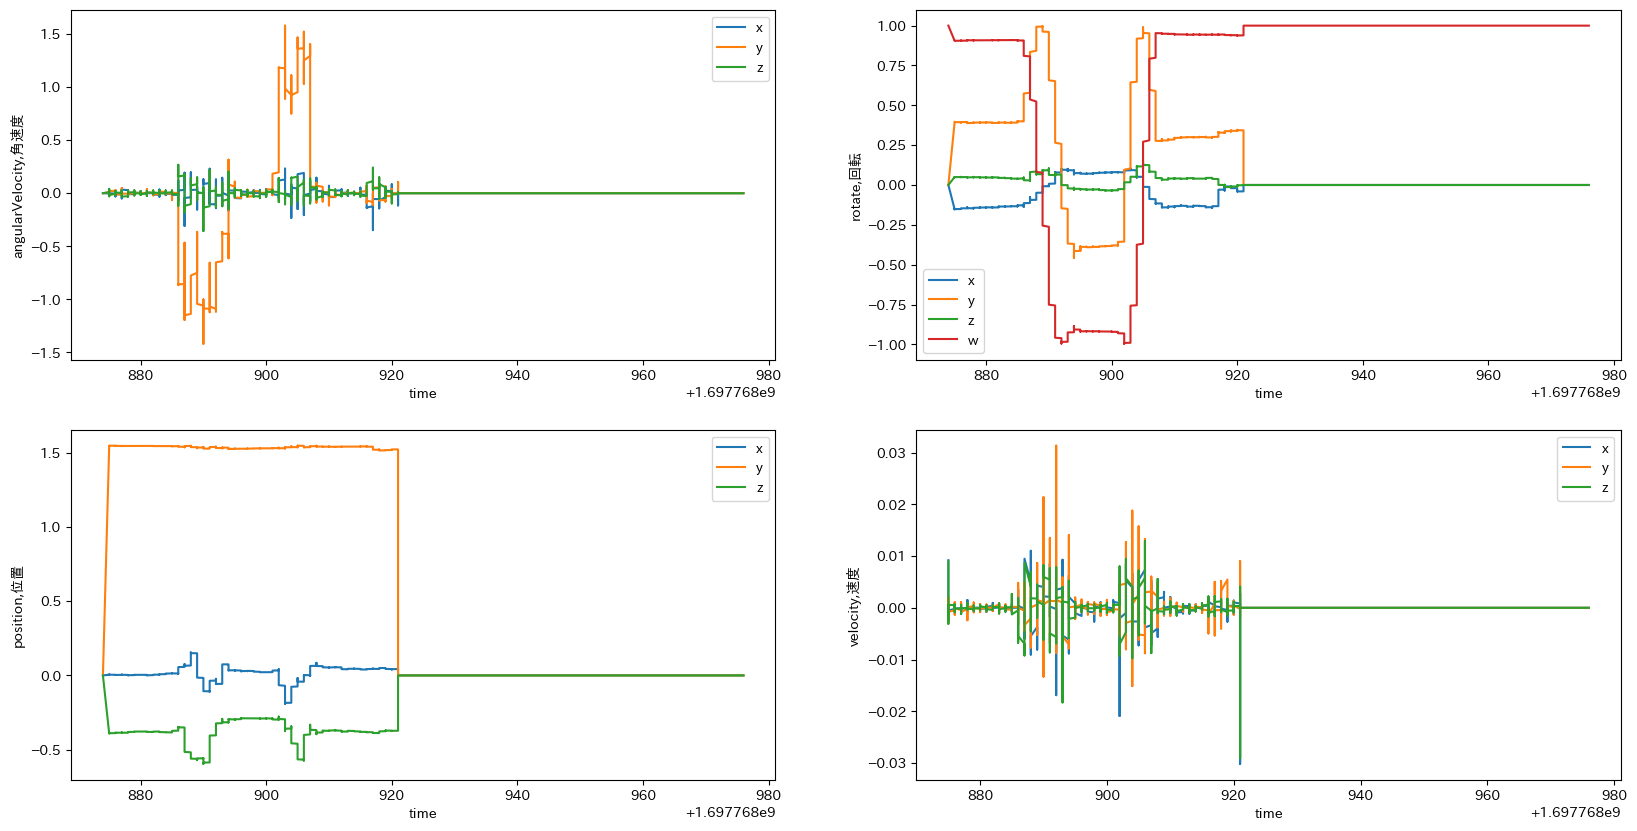

In [13]:
# とりあえず全て描画
plt.figure(figsize=(20, 10))

plt.title('spin')
plt.subplot(2, 2, 1)
plt.plot(df_spin_angularVelocity['time'], df_spin_angularVelocity['x'], label='x')
plt.plot(df_spin_angularVelocity['time'], df_spin_angularVelocity['y'], label='y')
plt.plot(df_spin_angularVelocity['time'], df_spin_angularVelocity['z'], label='z')
plt.xlabel('time')
plt.ylabel('angularVelocity,角速度')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df_spin_rotate['time'], df_spin_rotate['x'], label='x')
plt.plot(df_spin_rotate['time'], df_spin_rotate['y'], label='y')
plt.plot(df_spin_rotate['time'], df_spin_rotate['z'], label='z')
plt.plot(df_spin_rotate['time'], df_spin_rotate['w'], label='w')
plt.xlabel('time')
plt.ylabel('rotate,回転')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df_spin_position['time'], df_spin_position['x'], label='x')
plt.plot(df_spin_position['time'], df_spin_position['y'], label='y')
plt.plot(df_spin_position['time'], df_spin_position['z'], label='z')
plt.xlabel('time')
plt.ylabel('position,位置')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df_spin_acceleration['time'], df_spin_acceleration['x'], label='x')
plt.plot(df_spin_acceleration['time'], df_spin_acceleration['y'], label='y')
plt.plot(df_spin_acceleration['time'], df_spin_acceleration['z'], label='z')
plt.xlabel('time')
plt.ylabel('velocity,速度')
plt.legend()

plt.show()

/var/folders/qx/g75h6sns4slc8l4sb8lsy3l00000gn/T/ipykernel_80280/746627184.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


KeyError: 'x'

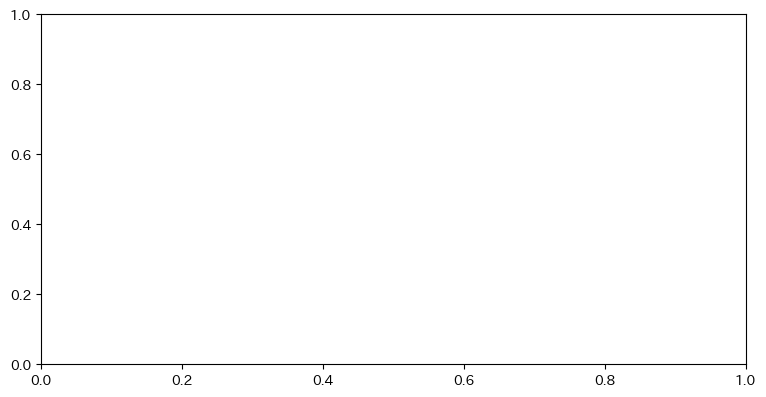

In [14]:
# 描画
plt.figure(figsize=(20, 10))
plt.title('updown')
plt.subplot(2, 2, 1)
plt.plot(df_updown_angularVelocity['time'], df_updown_angularVelocity['x'], label='x')
plt.plot(df_updown_angularVelocity['time'], df_updown_angularVelocity['y'], label='y')
plt.plot(df_updown_angularVelocity['time'], df_updown_angularVelocity['z'], label='z')
plt.xlabel('time')
plt.ylabel('angularVelocity,角速度')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df_updown_rotate['time'], df_updown_rotate['x'], label='x')
plt.plot(df_updown_rotate['time'], df_updown_rotate['y'], label='y')
plt.plot(df_updown_rotate['time'], df_updown_rotate['z'], label='z')
# plt.plot(df_updown_rotate['time'], df_updown_rotate['w'], label='w')
plt.xlabel('time')
plt.ylabel('rotate,回転')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df_updown_position['time'], df_updown_position['x'], label='x')
plt.plot(df_updown_position['time'], df_updown_position['y'], label='y')
plt.plot(df_updown_position['time'], df_updown_position['z'], label='z')
plt.xlabel('time')
plt.ylabel('position,位置')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df_updown_velocity['time'], df_updown_velocity['x'], label='x')
plt.plot(df_updown_velocity['time'], df_updown_velocity['y'], label='y')
plt.plot(df_updown_velocity['time'], df_updown_velocity['z'], label='z')
plt.xlabel('time')
plt.ylabel('velocity,速度')
plt.legend()

plt.show()


In [ ]:
# 描画
plt.figure(figsize=(20, 10))
plt.title('updown')
plt.subplot(2, 2, 1)
plt.plot(df_updown_angularVelocity['time'], df_updown_angularVelocity['x'], label='x')
plt.plot(df_updown_angularVelocity['time'], df_updown_angularVelocity['y'], label='y')
plt.plot(df_updown_angularVelocity['time'], df_updown_angularVelocity['z'], label='z')
plt.xlabel('time')
plt.ylabel('angularVelocity,角速度')
# スタートから07:16:45までのデータを描画
plt.xlim(pd.to_datetime('2020-01-01 07:16:45'), df_updown_angularVelocity['time'].max())
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df_updown_rotate['time'], df_updown_rotate['x'], label='x')
plt.plot(df_updown_rotate['time'], df_updown_rotate['y'], label='y')
plt.plot(df_updown_rotate['time'], df_updown_rotate['z'], label='z')
plt.plot(df_updown_rotate['time'], df_updown_rotate['w'], label='w')
plt.xlabel('time')
plt.ylabel('rotate,回転')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df_updown_position['time'], df_updown_position['x'], label='x')
plt.plot(df_updown_position['time'], df_updown_position['y'], label='y')
plt.plot(df_updown_position['time'], df_updown_position['z'], label='z')
plt.xlabel('time')
plt.ylabel('position,位置')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df_updown_acceleration['time'], df_updown_acceleration['x'], label='x')
plt.plot(df_updown_acceleration['time'], df_updown_acceleration['y'], label='y')
plt.plot(df_updown_acceleration['time'], df_updown_acceleration['z'], label='z')
plt.xlabel('time')
plt.ylabel('velocity,加速度')
plt.legend()

plt.show()


NameError: name 'plt' is not defined

/var/folders/qx/g75h6sns4slc8l4sb8lsy3l00000gn/T/ipykernel_82653/2840944154.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


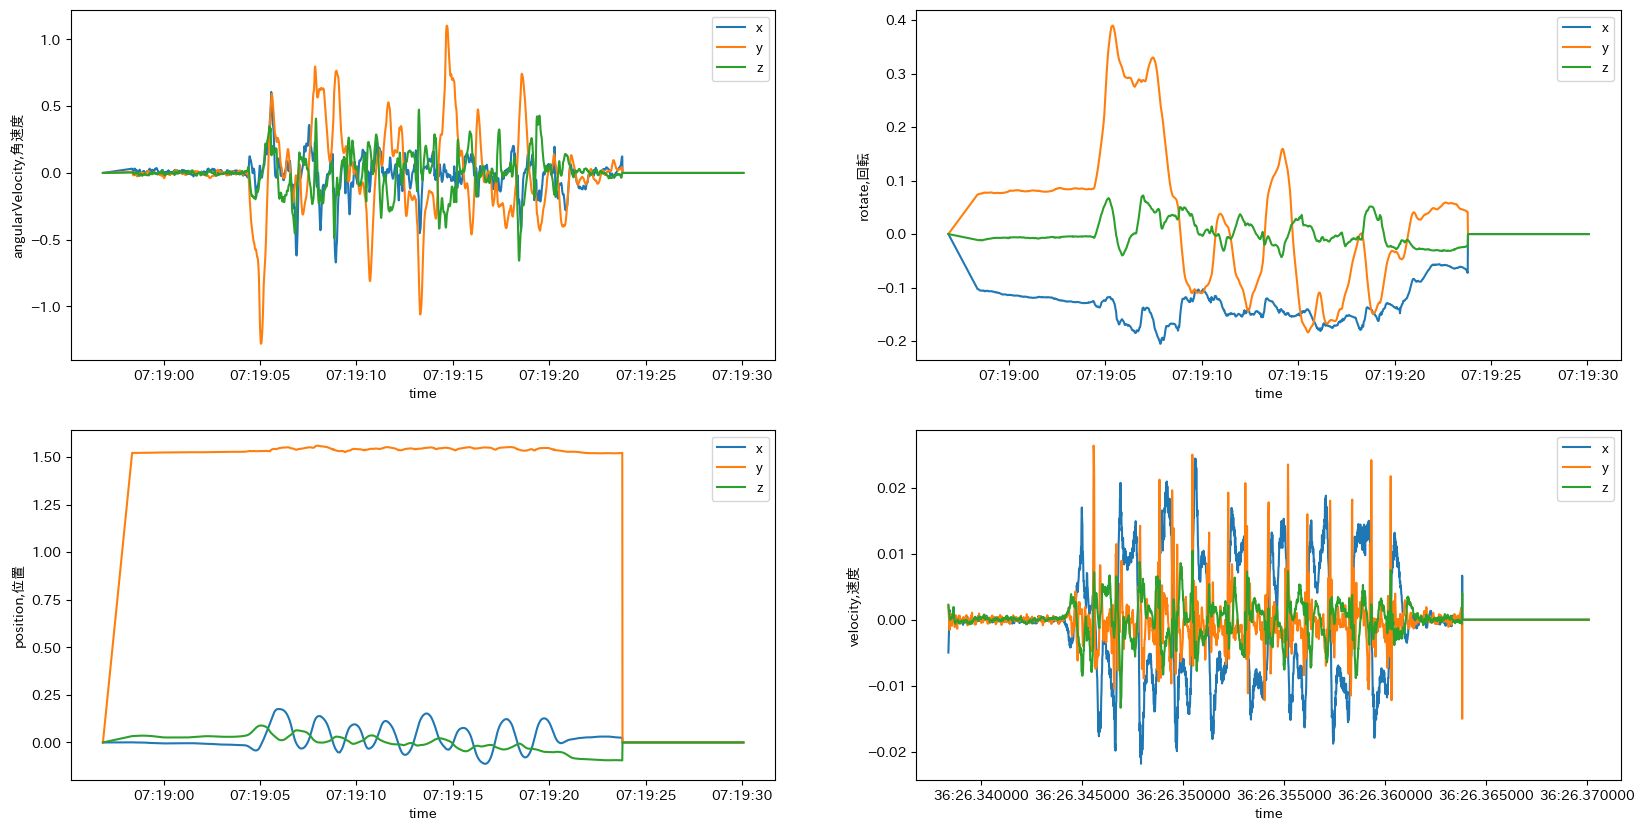

In [ ]:
# 描画
plt.figure(figsize=(20, 10))
plt.title('work')
plt.subplot(2, 2, 1)
plt.plot(df_work_angularVelocity['time'], df_work_angularVelocity['x'], label='x')
plt.plot(df_work_angularVelocity['time'], df_work_angularVelocity['y'], label='y')
plt.plot(df_work_angularVelocity['time'], df_work_angularVelocity['z'], label='z')
plt.xlabel('time')
plt.ylabel('angularVelocity,角速度')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df_work_rotate['time'], df_work_rotate['x'], label='x')
plt.plot(df_work_rotate['time'], df_work_rotate['y'], label='y')
plt.plot(df_work_rotate['time'], df_work_rotate['z'], label='z')
# plt.plot(df_work_rotate['time'], df_work_rotate['w'], label='w')
plt.xlabel('time')
plt.ylabel('rotate,回転')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df_work_position['time'], df_work_position['x'], label='x')
plt.plot(df_work_position['time'], df_work_position['y'], label='y')
plt.plot(df_work_position['time'], df_work_position['z'], label='z')
plt.xlabel('time')
plt.ylabel('position,位置')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df_work_velocity['time'], df_work_velocity['x'], label='x')
plt.plot(df_work_velocity['time'], df_work_velocity['y'], label='y')
plt.plot(df_work_velocity['time'], df_work_velocity['z'], label='z')
plt.xlabel('time')
plt.ylabel('velocity,速度')
plt.legend()

plt.show()


/var/folders/qx/g75h6sns4slc8l4sb8lsy3l00000gn/T/ipykernel_82653/2530069752.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


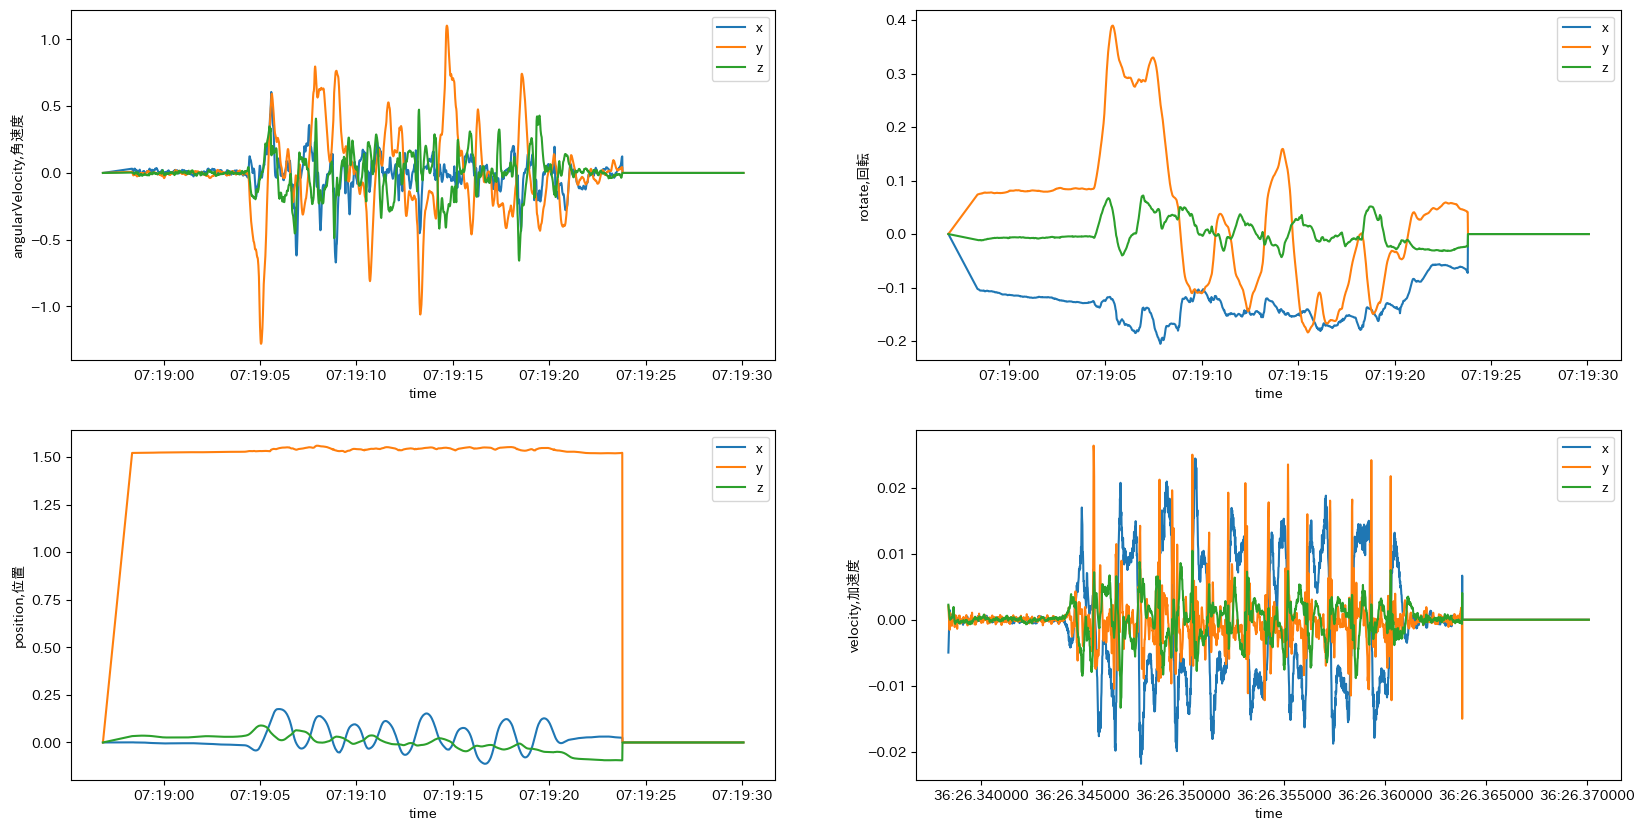

In [ ]:
# 描画
plt.figure(figsize=(20, 10))
plt.title('work')
plt.subplot(2, 2, 1)
plt.plot(df_work_angularVelocity['time'], df_work_angularVelocity['x'], label='x')
plt.plot(df_work_angularVelocity['time'], df_work_angularVelocity['y'], label='y')
plt.plot(df_work_angularVelocity['time'], df_work_angularVelocity['z'], label='z')
plt.xlabel('time')
plt.ylabel('angularVelocity,角速度')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df_work_rotate['time'], df_work_rotate['x'], label='x')
plt.plot(df_work_rotate['time'], df_work_rotate['y'], label='y')
plt.plot(df_work_rotate['time'], df_work_rotate['z'], label='z')
# plt.plot(df_work_rotate['time'], df_work_rotate['w'], label='w')
plt.xlabel('time')
plt.ylabel('rotate,回転')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df_work_position['time'], df_work_position['x'], label='x')
plt.plot(df_work_position['time'], df_work_position['y'], label='y')
plt.plot(df_work_position['time'], df_work_position['z'], label='z')
plt.xlabel('time')
plt.ylabel('position,位置')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df_work_acceleration['time'], df_work_acceleration['x'], label='x')
plt.plot(df_work_acceleration['time'], df_work_acceleration['y'], label='y')
plt.plot(df_work_acceleration['time'], df_work_acceleration['z'], label='z')
plt.xlabel('time')
plt.ylabel('velocity,加速度')
plt.legend()

plt.show()
